In [34]:
import os
import nptdms
import matplotlib.pyplot as plt

In [35]:
path_to_data = "/Users/hayden/Desktop/FIREBALL/HRMT68_data/ldv_and_strain_gauges/Triggers/2025/05/13/2025-05-13T180531_0200.tdms"

This year, the tdms file will not only have columns `timestamp`, ‘POS_LDV’, and ‘SPEED_LDV’, but also ‘STRAIN_GAUGE_CENTER’ and `STRAIN_GAUGE_DOWNSTREAM`.

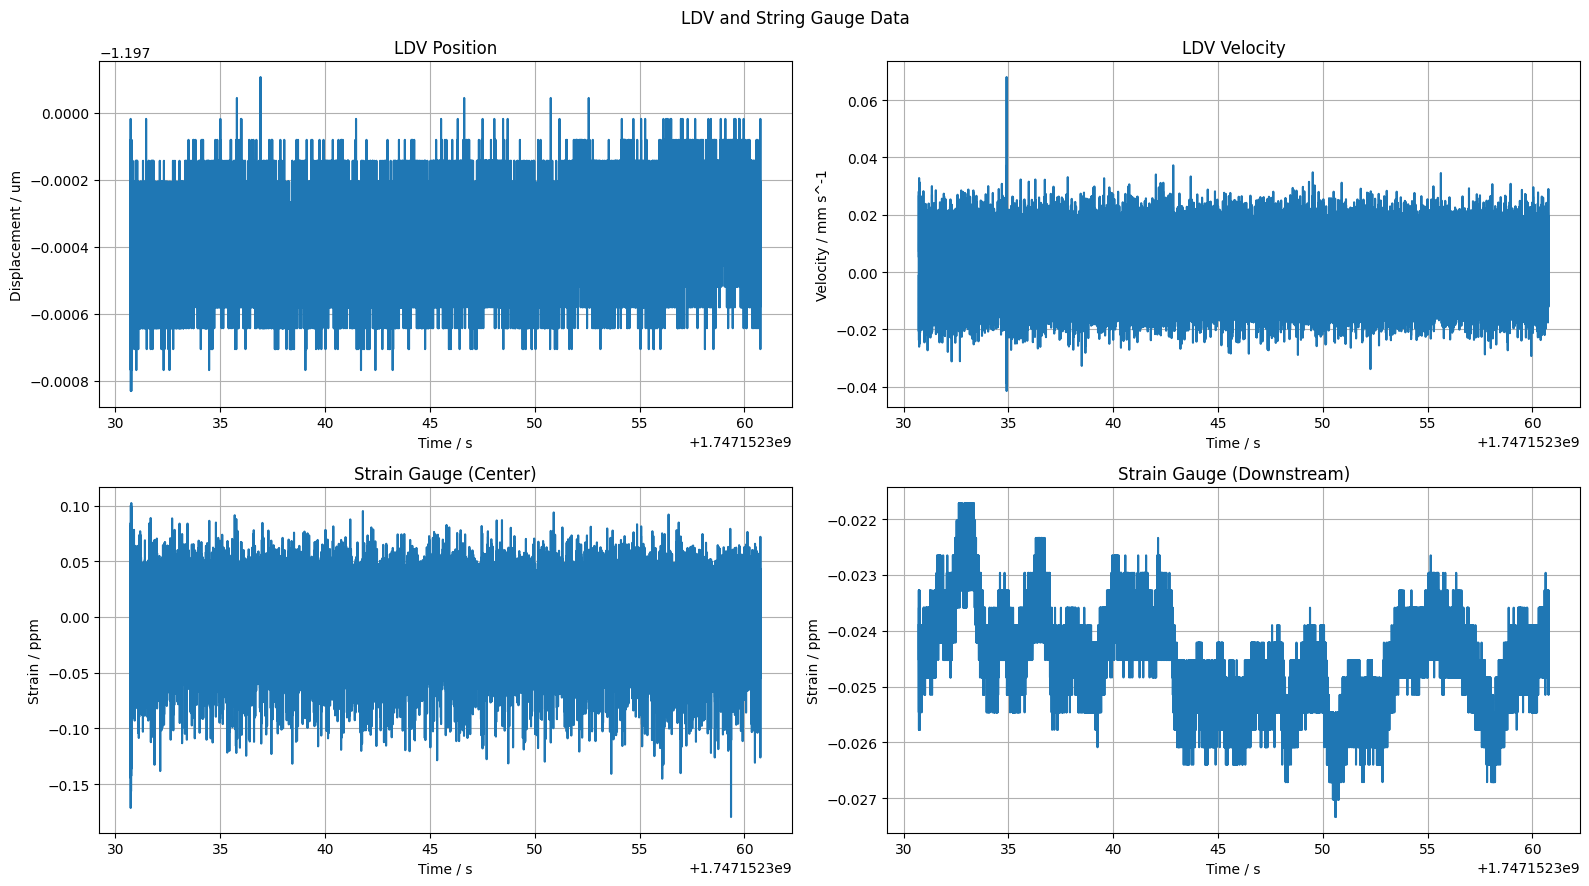

In [51]:
with nptdms.TdmsFile.open(path_to_data) as tdms_file:
    group = tdms_file["LDV_SG"]
    times = group["timestamp"]
    ldv_position = group["POS_LDV"]
    ldv_speed = group["SPEED_LDV"]
    strain_gauge_center = group["StrainGaugeCenter"]
    strain_gauge_downstream = group["StrainGaugeDownstream"]

    fig, axs = plt.subplots(2, 2, figsize=(16,9))

    # LDV POSITION VS TIME
    axs[0, 0].plot(times, ldv_position)
    axs[0, 0].set_title("LDV Position")
    axs[0, 0].set_xlabel("Time / s")
    axs[0, 0].set_ylabel("Displacement / um")
    axs[0, 0].grid()

    # LDV SPEED VS TIME
    axs[0,1].plot(times, ldv_speed)
    axs[0, 1].set_title("LDV Velocity")
    axs[0, 1].set_xlabel("Time / s")
    axs[0, 1].set_ylabel("Velocity / mm s^-1")
    axs[0, 1].grid()
    
    # CENTRAL GAUGE POSITION VS TIME
    axs[1,0].plot(times, strain_gauge_center)
    axs[1, 0].set_title("Strain Gauge (Center)")
    axs[1, 0].set_xlabel("Time / s")
    axs[1, 0].set_ylabel("Strain / ppm")
    axs[1, 0].grid()
    
    # DOWNSTREAM GAUGE POSITION VS TIME
    axs[1,1].plot(times, strain_gauge_downstream)
    axs[1, 1].set_title("Strain Gauge (Downstream)")
    axs[1, 1].set_xlabel("Time / s")
    axs[1, 1].set_ylabel("Strain / ppm")
    axs[1, 1].grid()

    fig.suptitle("LDV and String Gauge Data")
    fig.tight_layout()
    plt.show()


In [38]:
with nptdms.TdmsFile.open(path_to_data) as tdms_file:
    print("Groups:", tdms_file.groups())
    for group in tdms_file.groups():
        print(f"Channels in {group}: {tdms_file[group.name].channels()}")

Groups: [<TdmsGroup with path /'LDV_SG'>]
Channels in <TdmsGroup with path /'LDV_SG'>: [<TdmsChannel with path /'LDV_SG'/'ranges'>, <TdmsChannel with path /'LDV_SG'/'timestamp'>, <TdmsChannel with path /'LDV_SG'/'POS_LDV'>, <TdmsChannel with path /'LDV_SG'/'SPEED_LDV'>, <TdmsChannel with path /'LDV_SG'/'StrainGaugeCenter'>, <TdmsChannel with path /'LDV_SG'/'StrainGaugeDownstream'>]
